In [24]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')
df.head(10)

,Date,Mean temparature
0,1988-01-01,-23.00
1,1988-01-02,-20.50
2,1988-01-03,-22.00
3,1988-01-04,-30.50
4,1988-01-05,-31.00
5,1988-01-06,-27.50
6,1988-01-07,-26.25
7,1988-01-08,-26.50
8,1988-01-09,-23.00
9,1988-01-10,-23.50


In [6]:
df.index = df['Date'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))
df.head(5)

,Date,Mean temparature,Month_Year
Date,,,
1988-01-01,1988-01-01,-23.0,01-1988
1988-01-02,1988-01-02,-20.5,01-1988
1988-01-03,1988-01-03,-22.0,01-1988
1988-01-04,1988-01-04,-30.5,01-1988
1988-01-05,1988-01-05,-31.0,01-1988


In [7]:
monthly_stats = df.groupby(by='Month_Year')['Mean temparature'].aggregate([np.mean, np.median, np.std])
monthly_stats.reset_index(inplace=True)
monthly_stats.head(10)

,Month_Year,mean,median,std
0,01-1988,-22.137097,-23.00,5.260640
1,01-1989,-17.129032,-18.00,8.250725
2,01-1990,-15.112903,-12.00,6.606764
3,01-1991,-23.038710,-24.50,7.095570
4,02-1988,-19.025862,-19.50,8.598522
5,02-1989,-19.267857,-19.25,8.092042
6,02-1990,-17.482143,-16.50,8.018477
7,02-1991,-10.967857,-12.15,8.220753
8,03-1988,-8.258065,-9.25,5.341459
9,03-1989,-12.508065,-9.50,8.289925


In [8]:
monthly_stats['Year'] = monthly_stats['Month_Year'].map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats['Month_Year'].map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head(10)

,Month_Year,mean,median,std,Year,Month
0,01-1988,-22.137097,-23.000,5.260640,1988,01
4,02-1988,-19.025862,-19.500,8.598522,1988,02
8,03-1988,-8.258065,-9.250,5.341459,1988,03
12,04-1988,2.641667,1.875,5.057720,1988,04
16,05-1988,11.290323,11.000,6.254364,1988,05
20,06-1988,19.291667,19.000,3.909032,1988,06
24,07-1988,19.048387,18.500,3.073692,1988,07
28,08-1988,17.379032,18.000,3.183205,1988,08
32,09-1988,10.675000,10.750,3.880294,1988,09
36,10-1988,2.467742,3.000,6.697245,1988,10


Text(0.5, 0, 'Month_Year')

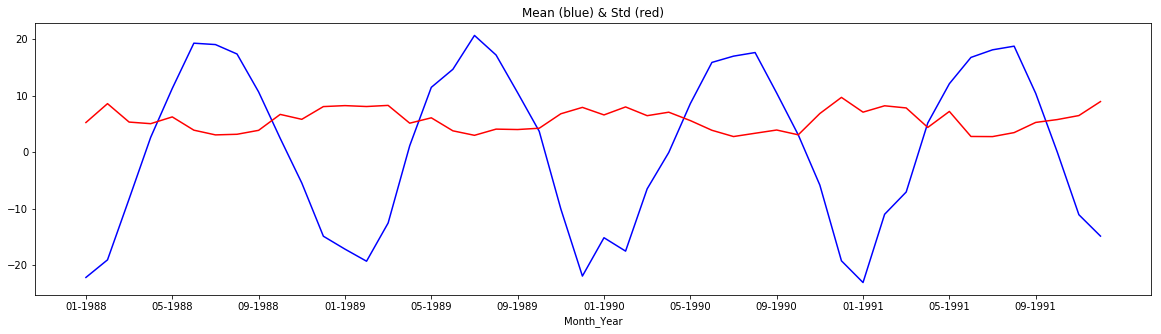

In [17]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1,1,1)
plt.plot(monthly_stats['Month_Year'], monthly_stats['mean'], color='b')
plt.plot(monthly_stats['Month_Year'], monthly_stats['std'], color='r')
ax.set_xticks(ax.get_xticks()[::4])
ax.set_title('Mean (blue) & Std (red)')
ax.set_xlabel('Month_Year')

In [18]:
weekly_moving_average = df['Mean temparature'].rolling(7).mean()
monthly_moving_average = df['Mean temparature'].rolling(30).mean()
# With strides
weekly_moving_average_2stride = df['Mean temparature'].rolling(7).mean()[::2]
monthly_moving_average_2stride = df['Mean temparature'].rolling(30).mean()[::2]

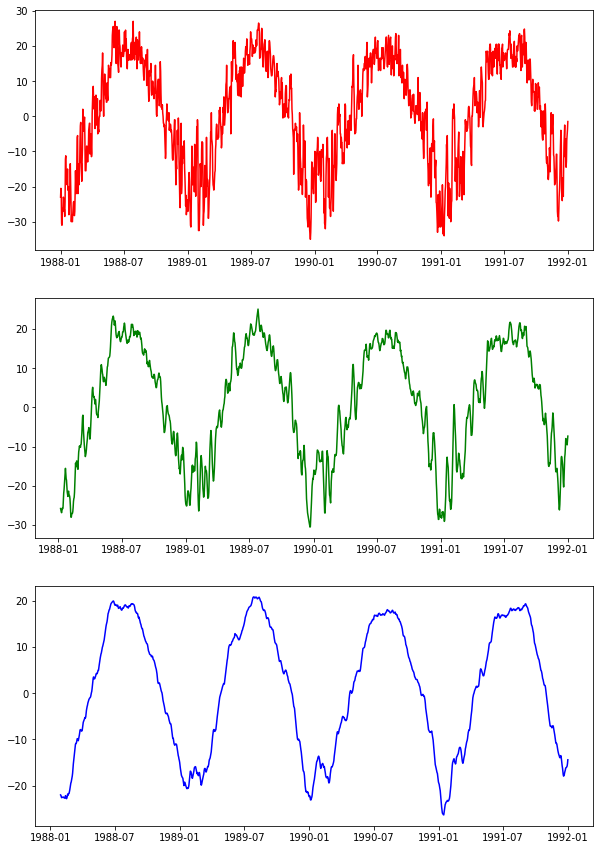

In [22]:
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.plot(df.index, df['Mean temparature'],color='r')
plt.subplot(312)
plt.plot(df.index, weekly_moving_average,color='g')
plt.subplot(313)
plt.plot(df.index, monthly_moving_average,color='b')